In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [9]:
import joblib

In [2]:
df = pd.read_csv(r"C:\Users\HARSHITH\Downloads\pemfc_preprocessed_data.csv")
df.head()

,I,P,Q,T,Hydrogen,Oxygen,RH anode,Rh Cathode,V
0,-0.886787,-1.027522,-0.806638,-1.261444,-1.873236,-1.227992,-2.493136,-1.875273,491.114619
1,-0.886787,-1.027522,-0.806638,-1.261444,-1.872990,-1.227992,-2.493136,-1.875273,491.114619
2,-0.886787,-1.027522,-0.806638,-1.261444,-1.872671,-1.227991,-2.493136,-1.875273,491.114619
3,-0.886787,-1.027522,-0.806638,-1.261444,-1.870597,-1.227988,-2.493136,-1.875273,491.114619
4,-0.886787,-1.027522,-0.806638,-1.261444,-1.867493,-1.227981,-2.493136,-1.875273,491.114619


In [3]:
X = df[['I', 'T', 'Hydrogen', 'Oxygen']]
y = df['V']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
)

In [6]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=100))])

In [7]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error(MAE): {mae:.4f}")
print(f"Mean Squared Error(MSE): {mse:.4f}")

R² Score: 0.9863
Mean Absolute Error(MAE): 3.1732
Mean Squared Error(MSE): 48.4043


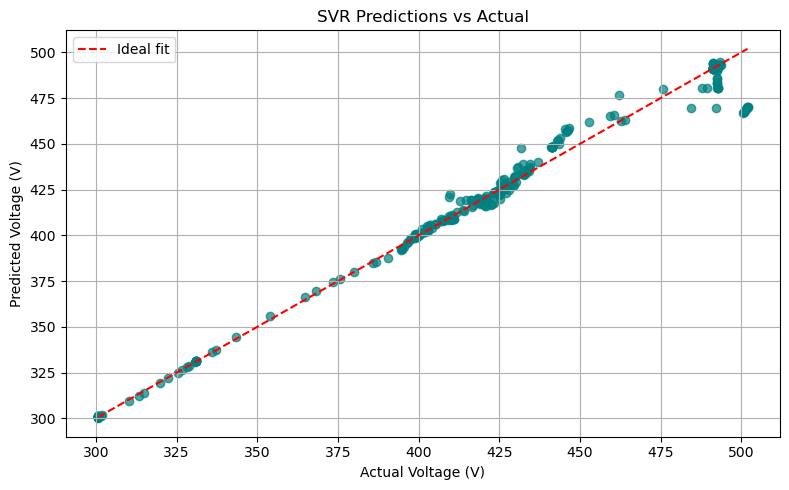

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='teal', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal fit')
plt.xlabel("Actual Voltage (V)")
plt.ylabel("Predicted Voltage (V)")
plt.title("SVR Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
joblib.dump(model, '../models/svr_model.pkl')
print("Model saved as svr_model.pkl")

Model saved as svr_model.pkl
